# Post processing

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load libraries

In [4]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import dill

Load environment

In [6]:
filename = 'globalsave.pkl'
dill.load_session(filename)

Check for how many POSs we have surroundings info

In [44]:
POSs_y = list(df_aggregate_per_day_short.store_code.unique())
POSs_surr = list(metadata.store_code.unique())

len(POSs_y), len(POSs_surr), sum([x in POSs_surr for x in POSs_y]), round(sum([x in POSs_surr for x in POSs_y])/len(POSs_y),3)

(903, 537, 531, 0.588)

Info about surroudings for ~60% POSs.

In [68]:
POSs_with_surr_no_y = list(set(POSs_surr)-set(POSs_y))
POSs_with_surr_no_y.sort()
POSs_with_surr_no_y

[12028, 15133, 20447, 24370, 29459, 32289]

For 6 POSs we have info about the surroundings but without information on selling. 


Investigate how many days shop open (under assumption made in `analysis` and how many are selling days.

In [84]:
df_aggregate_per_day_short[df_aggregate_per_day_short.store_code == 249]

,store_code,date,volume_day,volume_nan,volume_n,Perc_nan,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,249,2016-12-13,300.0,17.0,18.0,0.944444,2016,12,50,13,1,348,False,False,False,False,False,False,1481587200
1,249,2016-12-14,0.0,18.0,18.0,1.000000,2016,12,50,14,2,349,False,False,False,False,False,False,1481673600
2,249,2016-12-15,0.0,18.0,18.0,1.000000,2016,12,50,15,3,350,False,False,False,False,False,False,1481760000
3,249,2016-12-16,0.0,18.0,18.0,1.000000,2016,12,50,16,4,351,False,False,False,False,False,False,1481846400
4,249,2016-12-17,0.0,19.0,19.0,1.000000,2016,12,50,17,5,352,False,False,False,False,False,False,1481932800
5,249,2016-12-18,0.0,17.0,17.0,1.000000,2016,12,50,18,6,353,False,False,False,False,False,False,1482019200
6,249,2016-12-19,0.0,19.0,19.0,1.000000,2016,12,51,19,0,354,False,False,False,False,False,False,1482105600
7,249,2016-12-20,30.0,18.0,19.0,0.947368,2016,12,51,20,1,355,False,False,False,False,False,False,1482192000
8,249,2016-12-21,30.0,17.0,18.0,0.944444,2016,12,51,21,2,356,False,False,False,False,False,False,1482278400
9,249,2016-12-22,300.0,16.0,17.0,0.941176,2016,12,51,22,3,357,False,False,False,False,False,False,1482364800


In [89]:
def get_lag(shop):
    d = {}
    d['days'] = (max(shop['date']) - min(shop['date'])).days  + 1
    d['days_sell'] = np.count_nonzero(shop['volume_day'])
    return pd.Series(d, index = ['days','days_sell'])


flds = ['store_code','volume_day','date']
df_shops_days = df_aggregate_per_day_short[flds].groupby('store_code').apply(get_lag).reset_index()
df_shops_days['prop_selling_days'] = df_shops_days.days_sell/df_shops_days.days
df_shops_days.sort_values('days')



,store_code,days,days_sell,prop_selling_days
750,32357,1,1,1.000000
21,4032,1,1,1.000000
16,3745,1,1,1.000000
62,11007,1,1,1.000000
15,3655,2,2,1.000000
20,4013,3,3,1.000000
4,1498,4,3,0.750000
6,2331,4,2,0.500000
19,3958,4,3,0.750000
60,10992,5,5,1.000000


Text(0,0.5,'Proportion days selling')

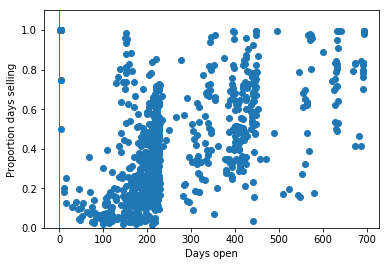

In [96]:
plt.hist(df_shops_days.prop_selling_days, bins=30);

plt.scatter(df_shops_days.days, df_shops_days.prop_selling_days)
plt.ylim(0,1.1)
plt.xlabel('Days open')
plt.ylabel('Proportion days selling')

## Create final dataset

In [20]:
#metadata.sort_values('store_code', inplace=True)
aa = df_aggregate_per_day_short[df_aggregate_per_day_short.store_code == 282]
bb = metadata[metadata.store_code == 282]

cc = aa.merge(bb, how='left', on=['store_code','Dayofweek'])

In [24]:
cc.head()

,store_code,date,volume_day,volume_nan,volume_n,Perc_nan,Year,Month,Week,Day,...,university_n,university_types,veterinary_care_mean_ratings,veterinary_care_mean_user_ratings_total,veterinary_care_n,veterinary_care_types,zoo_mean_ratings,zoo_mean_user_ratings_total,zoo_n,zoo_types
0,282,2016-12-20,30.0,18.0,19.0,0.947368,2016,12,51,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,282,2016-12-20,30.0,18.0,19.0,0.947368,2016,12,51,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,282,2016-12-20,30.0,18.0,19.0,0.947368,2016,12,51,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,282,2016-12-20,30.0,18.0,19.0,0.947368,2016,12,51,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,282,2016-12-20,30.0,18.0,19.0,0.947368,2016,12,51,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
test = df_melt[(df_melt.store_code==282)]
#test[test.volume.notnull()]
test[test.date=='12/20/16'].shape

(19, 5)